<a href="https://colab.research.google.com/github/binary-GIT/DataScience/blob/main/Predicting_House_Prices_for_Pakistan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About DataSet
### The real estate sector in Pakistan is one of the most expanding sector, so it is of due importance to study the pricing of houses in different provinces, cities a and sectors of Pakistan to see what's the trend.

# Importing Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

In [2]:
house_data = pd.read_csv('/content/real_estate_data.csv', index_col=0, parse_dates=['date_added'])

In [3]:
house_data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000.0,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2.0,For Sale,2.0,2019-02-04,NaN,NaN,1089.004
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000.0,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3.0,For Sale,3.0,2019-05-04,NaN,NaN,15246.056
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000.0,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6.0,For Sale,5.0,2019-07-17,NaN,NaN,2178.008
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000.0,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4.0,For Sale,4.0,2019-04-05,NaN,NaN,10890.000
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000.0,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3.0,For Sale,3.0,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [4]:
house_data.shape

(51591, 17)

In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51591 entries, 0 to 51590
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   property_id    51591 non-null  int64         
 1   location_id    51591 non-null  int64         
 2   page_url       51591 non-null  object        
 3   property_type  51590 non-null  object        
 4   price          51590 non-null  float64       
 5   location       51590 non-null  object        
 6   city           51590 non-null  object        
 7   province_name  51590 non-null  object        
 8   latitude       51590 non-null  float64       
 9   longitude      51590 non-null  float64       
 10  baths          51590 non-null  float64       
 11  purpose        51590 non-null  object        
 12  bedrooms       51590 non-null  float64       
 13  date_added     51590 non-null  datetime64[ns]
 14  agency         21260 non-null  object        
 15  agent          21260 non

In [7]:
house_data.isnull().sum()

,0
property_id,0
location_id,0
page_url,0
property_type,1
price,1
location,1
city,1
province_name,1
latitude,1
longitude,1


In [8]:
house_data.duplicated().sum()

0

### Dropping unnecessary columns

In [9]:
house_data.drop(columns=['agency', 'agent', 'property_id', 'location_id', 'page_url', 'latitude', 'longitude', 'date_added'], inplace=True)

In [10]:
# Summary for continous variables

house_data.describe()

,price,baths,bedrooms,Total_Area
count,5.159000e+04,51590.000000,51590.000000,5.159000e+04
mean,1.882452e+07,3.214053,3.327835,1.099768e+04
std,3.795551e+07,2.223821,2.027952,3.240001e+04
min,1.000000e+00,0.000000,0.000000,0.000000e+00
25%,2.250000e+05,2.000000,2.000000,1.905757e+03
50%,8.200000e+06,3.000000,3.000000,5.445000e+03
75%,2.000000e+07,5.000000,5.000000,1.279580e+04
max,1.270000e+09,11.000000,18.000000,3.403125e+06


In [11]:
# Summary for categorical variables

house_data.describe(include='object')

,property_type,location,city,province_name,purpose
count,51590,51590,51590,51590,51590
unique,7,1341,5,3,2
top,House,DHA Defence,Karachi,Punjab,For Sale
freq,32031,6361,18446,21363,37597


In [12]:
for col in house_data.describe(include='object').columns:
    print(house_data[col].unique())

['Flat' 'House' 'Penthouse' 'Farm House' 'Lower Portion' 'Upper Portion'
 'Room' nan]
['G-10' 'E-11' 'G-15' ... 'Khayaban-e-Zohra' 'Dilawar Colony' nan]
['Islamabad' 'Lahore' 'Faisalabad' 'Rawalpindi' 'Karachi' nan]
['Islamabad Capital' 'Punjab' 'Sindh' nan]
['For Sale' 'For Rent' nan]


In [13]:
house_data[house_data['city'] == 'Karachi']

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area
156,House,450000000.0,Cantt,Karachi,Sindh,7.0,For Sale,6.0,21780.000
157,House,35000000.0,Gulistan-e-Jauhar,Karachi,Sindh,8.0,For Sale,6.0,4356.016
158,Flat,21000000.0,DHA Defence,Karachi,Sindh,3.0,For Sale,3.0,24230.339
159,House,6500000.0,Malir,Karachi,Sindh,1.0,For Sale,2.0,8712.032
160,House,13000000.0,Gadap Town,Karachi,Sindh,4.0,For Sale,4.0,26136.096
...,...,...,...,...,...,...,...,...,...
51507,Flat,18000.0,Gulshan-e-Iqbal Town,Karachi,Sindh,2.0,For Rent,2.0,9801.036
51508,Upper Portion,18500.0,North Karachi,Karachi,Sindh,2.0,For Rent,2.0,13068.048
51509,Flat,100000.0,Civil Lines,Karachi,Sindh,4.0,For Rent,3.0,18240.817
51510,Flat,18000.0,Gulistan-e-Jauhar,Karachi,Sindh,2.0,For Rent,2.0,7895.279


In [14]:
len(house_data.location.unique())

1342

# Limiting the data to Karachi

In [15]:
karachi_house_data = house_data[house_data['city'] == 'Karachi']

In [16]:
karachi_house_data.columns

Index(['property_type', 'price', 'location', 'city', 'province_name', 'baths',
       'purpose', 'bedrooms', 'Total_Area'],
      dtype='object')

In [17]:
print('Locations in Karachi: ', len(karachi_house_data.location.unique()))

Locations in Karachi:  184


In [18]:
karachi_house_data.location.unique()

array(['Cantt', 'Gulistan-e-Jauhar', 'DHA Defence', 'Malir', 'Gadap Town',
       'Gulshan-e-Iqbal Town', 'Scheme 33', 'Bath Island',
       'Abul Hassan Isphani Road', 'Nazimabad', 'Falcon Complex Faisal',
       'Shahra-e-Faisal', 'Gizri', 'Saddar Town', 'Federal B Area',
       'North Karachi', 'Navy Housing Scheme Karsaz', 'Jamshed Town',
       'Bahria Town Karachi', 'Jinnah Avenue', 'PAF Housing Scheme',
       'North Nazimabad', 'Clifton', 'Northern Bypass',
       'Fazaia Housing Scheme', 'New Karachi', 'Khalid Bin Walid Road',
       'Shaheed Millat Road', 'Anda Mor Road', 'Lyari Town',
       'Defence View Society', 'P & T Colony', 'Sea View Apartments',
       'Tariq Road', 'Baldia Town', 'Zamzama',
       'Gulshan-e-Usman Housing Society', 'Liaquatabad', 'Garden West',
       'Gulberg Town', 'Chapal Uptown', 'Baloch Colony', 'Manzoor Colony',
       'Aisha Manzil', 'Delhi Colony', 'Airport', 'Jamshed Road',
       'University Road', 'Shah Faisal Town', 'Civil Lines', 'Abid 

In [19]:
karachi_house_data

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area
156,House,450000000.0,Cantt,Karachi,Sindh,7.0,For Sale,6.0,21780.000
157,House,35000000.0,Gulistan-e-Jauhar,Karachi,Sindh,8.0,For Sale,6.0,4356.016
158,Flat,21000000.0,DHA Defence,Karachi,Sindh,3.0,For Sale,3.0,24230.339
159,House,6500000.0,Malir,Karachi,Sindh,1.0,For Sale,2.0,8712.032
160,House,13000000.0,Gadap Town,Karachi,Sindh,4.0,For Sale,4.0,26136.096
...,...,...,...,...,...,...,...,...,...
51507,Flat,18000.0,Gulshan-e-Iqbal Town,Karachi,Sindh,2.0,For Rent,2.0,9801.036
51508,Upper Portion,18500.0,North Karachi,Karachi,Sindh,2.0,For Rent,2.0,13068.048
51509,Flat,100000.0,Civil Lines,Karachi,Sindh,4.0,For Rent,3.0,18240.817
51510,Flat,18000.0,Gulistan-e-Jauhar,Karachi,Sindh,2.0,For Rent,2.0,7895.279


## Feature Engineering

In [20]:
karachi_house_data.reset_index(drop=True, inplace=True)

In [21]:
karachi_house_data.rename(columns={'Total_Area': 'sq_ft'}, inplace=True)

<ipython-input-21-ece3f2ba1070>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karachi_house_data.rename(columns={'Total_Area': 'sq_ft'}, inplace=True)


In [22]:
# Converting price to lakhs

karachi_house_data['price'] = round(karachi_house_data['price']/100000,2)
karachi_house_data.rename(columns={'price': 'price_in_lakh'}, inplace=True)

<ipython-input-22-23008496c215>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karachi_house_data['price'] = round(karachi_house_data['price']/100000,2)
<ipython-input-22-23008496c215>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karachi_house_data.rename(columns={'price': 'price_in_lakh'}, inplace=True)


In [23]:
karachi_house_data

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft
0,House,4500.00,Cantt,Karachi,Sindh,7.0,For Sale,6.0,21780.000
1,House,350.00,Gulistan-e-Jauhar,Karachi,Sindh,8.0,For Sale,6.0,4356.016
2,Flat,210.00,DHA Defence,Karachi,Sindh,3.0,For Sale,3.0,24230.339
3,House,65.00,Malir,Karachi,Sindh,1.0,For Sale,2.0,8712.032
4,House,130.00,Gadap Town,Karachi,Sindh,4.0,For Sale,4.0,26136.096
...,...,...,...,...,...,...,...,...,...
18441,Flat,0.18,Gulshan-e-Iqbal Town,Karachi,Sindh,2.0,For Rent,2.0,9801.036
18442,Upper Portion,0.18,North Karachi,Karachi,Sindh,2.0,For Rent,2.0,13068.048
18443,Flat,1.00,Civil Lines,Karachi,Sindh,4.0,For Rent,3.0,18240.817
18444,Flat,0.18,Gulistan-e-Jauhar,Karachi,Sindh,2.0,For Rent,2.0,7895.279


In [24]:
karachi_house_data['sq_ft'] = round(karachi_house_data['sq_ft'],2)

<ipython-input-24-c4eb792bba4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karachi_house_data['sq_ft'] = round(karachi_house_data['sq_ft'],2)


In [25]:
karachi_house_data

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft
0,House,4500.00,Cantt,Karachi,Sindh,7.0,For Sale,6.0,21780.00
1,House,350.00,Gulistan-e-Jauhar,Karachi,Sindh,8.0,For Sale,6.0,4356.02
2,Flat,210.00,DHA Defence,Karachi,Sindh,3.0,For Sale,3.0,24230.34
3,House,65.00,Malir,Karachi,Sindh,1.0,For Sale,2.0,8712.03
4,House,130.00,Gadap Town,Karachi,Sindh,4.0,For Sale,4.0,26136.10
...,...,...,...,...,...,...,...,...,...
18441,Flat,0.18,Gulshan-e-Iqbal Town,Karachi,Sindh,2.0,For Rent,2.0,9801.04
18442,Upper Portion,0.18,North Karachi,Karachi,Sindh,2.0,For Rent,2.0,13068.05
18443,Flat,1.00,Civil Lines,Karachi,Sindh,4.0,For Rent,3.0,18240.82
18444,Flat,0.18,Gulistan-e-Jauhar,Karachi,Sindh,2.0,For Rent,2.0,7895.28


In [26]:
karachi_house_data['sq_yards'] = round(karachi_house_data['sq_ft']/9,2)

<ipython-input-26-4c70afc6ed87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karachi_house_data['sq_yards'] = round(karachi_house_data['sq_ft']/9,2)


In [27]:
karachi_house_data.head()

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.0,Cantt,Karachi,Sindh,7.0,For Sale,6.0,21780.00,2420.00
1,House,350.0,Gulistan-e-Jauhar,Karachi,Sindh,8.0,For Sale,6.0,4356.02,484.00
2,Flat,210.0,DHA Defence,Karachi,Sindh,3.0,For Sale,3.0,24230.34,2692.26
3,House,65.0,Malir,Karachi,Sindh,1.0,For Sale,2.0,8712.03,968.00
4,House,130.0,Gadap Town,Karachi,Sindh,4.0,For Sale,4.0,26136.10,2904.01


<Axes: >

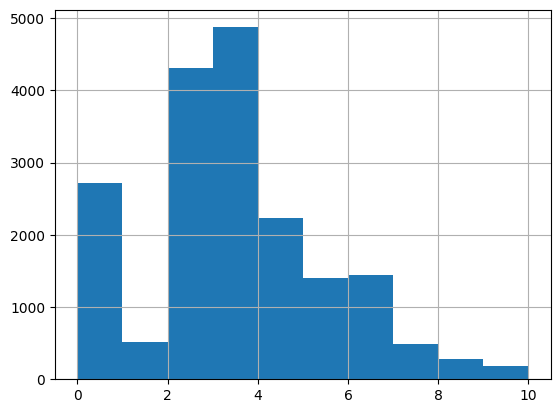

In [28]:
karachi_house_data['baths'].hist()

<Axes: >

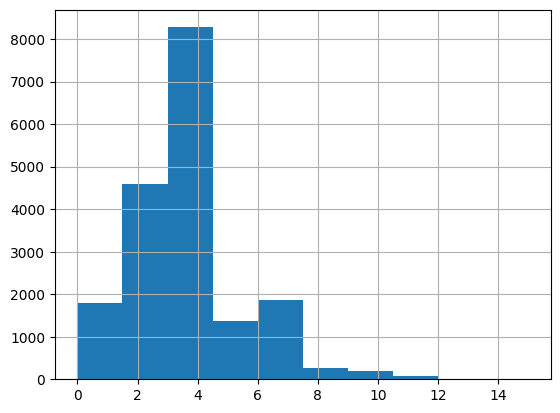

In [29]:
karachi_house_data['bedrooms'].hist()

<Axes: xlabel='bedrooms'>

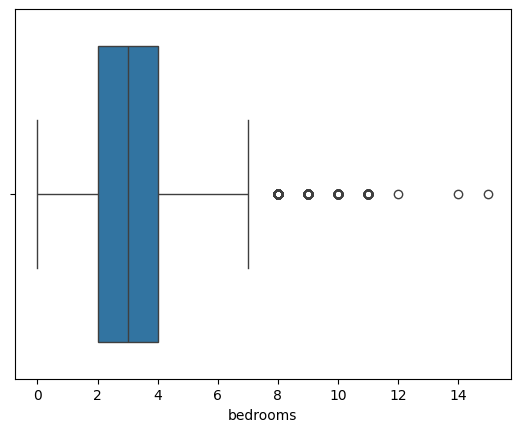

In [30]:
sns.boxplot(data=karachi_house_data, x='bedrooms')

In [31]:
karachi_house_data[karachi_house_data['baths'] == 0]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
12,Flat,295.00,Cantt,Karachi,Sindh,0.0,For Sale,3.0,31036.61,3448.51
13,Flat,300.00,Cantt,Karachi,Sindh,0.0,For Sale,3.0,31036.61,3448.51
14,Flat,375.00,Cantt,Karachi,Sindh,0.0,For Sale,4.0,35664.88,3962.76
15,Flat,450.00,Bath Island,Karachi,Sindh,0.0,For Sale,3.0,24230.34,2692.26
18,Flat,50.00,Gulshan-e-Iqbal Town,Karachi,Sindh,0.0,For Sale,2.0,14701.55,1633.51
...,...,...,...,...,...,...,...,...,...,...
18406,House,100.00,Bahria Town Karachi,Karachi,Sindh,0.0,For Sale,0.0,2178.01,242.00
18408,Flat,113.00,Gulistan-e-Jauhar,Karachi,Sindh,0.0,For Sale,3.0,21235.58,2359.51
18416,Flat,54.00,Gulistan-e-Jauhar,Karachi,Sindh,0.0,For Sale,0.0,13340.30,1482.26
18418,Flat,68.00,University Road,Karachi,Sindh,0.0,For Sale,0.0,8984.28,998.25


In [32]:
karachi_house_data['bedrooms'].value_counts()

,count
bedrooms,
3.0,5736
2.0,4600
4.0,2540
6.0,1554
0.0,1522
5.0,1375
7.0,304
1.0,260
8.0,258


In [34]:
karachi_house_data['bedrooms'].mean()

3.2620080234197117

In [35]:
karachi_house_data[karachi_house_data['sq_ft'] == 0]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
10694,House,44.0,Malir,Karachi,Sindh,2.0,For Sale,2.0,0.0,0.0


In [36]:
karachi_house_data = karachi_house_data[~(karachi_house_data['sq_ft'] == 0)]

In [37]:
karachi_house_data[(karachi_house_data['baths'] == 0) & (karachi_house_data['bedrooms'] == 0)]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
45,House,725.00,Gulshan-e-Iqbal Town,Karachi,Sindh,0.0,For Sale,0.0,65340.00,7260.00
61,Room,0.08,Gulshan-e-Iqbal Town,Karachi,Sindh,0.0,For Rent,0.0,2994.76,332.75
181,House,145.00,Scheme 33,Karachi,Sindh,0.0,For Sale,0.0,4356.02,484.00
200,House,1550.00,DHA Defence,Karachi,Sindh,0.0,For Sale,0.0,70785.00,7865.00
211,Lower Portion,0.80,Navy Housing Scheme Karsaz,Karachi,Sindh,0.0,For Rent,0.0,3811.51,423.50
...,...,...,...,...,...,...,...,...,...,...
18385,House,270.00,Nazimabad,Karachi,Sindh,0.0,For Sale,0.0,19329.82,2147.76
18406,House,100.00,Bahria Town Karachi,Karachi,Sindh,0.0,For Sale,0.0,2178.01,242.00
18416,Flat,54.00,Gulistan-e-Jauhar,Karachi,Sindh,0.0,For Sale,0.0,13340.30,1482.26
18418,Flat,68.00,University Road,Karachi,Sindh,0.0,For Sale,0.0,8984.28,998.25


we have to ignore them in anyway :)

In [38]:
karachi_house_data = karachi_house_data[~((karachi_house_data['baths'] == 0) & (karachi_house_data['bedrooms'] == 0))]
karachi_house_data.shape

(17001, 10)

In [39]:
karachi_house_data.reset_index(drop=True, inplace=True)

In [40]:
karachi_house_data

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.00,Cantt,Karachi,Sindh,7.0,For Sale,6.0,21780.00,2420.00
1,House,350.00,Gulistan-e-Jauhar,Karachi,Sindh,8.0,For Sale,6.0,4356.02,484.00
2,Flat,210.00,DHA Defence,Karachi,Sindh,3.0,For Sale,3.0,24230.34,2692.26
3,House,65.00,Malir,Karachi,Sindh,1.0,For Sale,2.0,8712.03,968.00
4,House,130.00,Gadap Town,Karachi,Sindh,4.0,For Sale,4.0,26136.10,2904.01
...,...,...,...,...,...,...,...,...,...,...
16996,Flat,0.18,Gulshan-e-Iqbal Town,Karachi,Sindh,2.0,For Rent,2.0,9801.04,1089.00
16997,Upper Portion,0.18,North Karachi,Karachi,Sindh,2.0,For Rent,2.0,13068.05,1452.01
16998,Flat,1.00,Civil Lines,Karachi,Sindh,4.0,For Rent,3.0,18240.82,2026.76
16999,Flat,0.18,Gulistan-e-Jauhar,Karachi,Sindh,2.0,For Rent,2.0,7895.28,877.25


In [41]:
karachi_house_data.describe()

,price_in_lakh,baths,bedrooms,sq_ft,sq_yards
count,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000
mean,228.362617,3.280101,3.539145,14287.615953,1587.512827
std,430.326222,1.879270,1.702769,19026.874766,2114.097430
min,0.000000,0.000000,0.000000,272.250000,30.250000
25%,27.000000,2.000000,2.000000,5445.000000,605.000000
50%,83.000000,3.000000,3.000000,11434.540000,1270.500000
75%,220.000000,4.000000,4.000000,17151.810000,1905.760000
max,7000.000000,10.000000,15.000000,952875.000000,105875.000000


In [42]:
karachi_house_data[karachi_house_data['sq_yards'] > 5000]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
40,House,915.0,DHA Defence,Karachi,Sindh,6.0,For Sale,5.0,65340.00,7260.00
47,House,1200.0,Gulshan-e-Iqbal Town,Karachi,Sindh,6.0,For Sale,6.0,65340.00,7260.00
51,House,2.0,DHA Defence,Karachi,Sindh,0.0,For Rent,6.0,65340.00,7260.00
72,House,950.0,Cantt,Karachi,Sindh,6.0,For Sale,7.0,59895.00,6655.00
79,House,850.0,Cantt,Karachi,Sindh,6.0,For Sale,6.0,59895.00,6655.00
...,...,...,...,...,...,...,...,...,...,...
16867,Flat,1350.0,Navy Housing Scheme Karsaz,Karachi,Sindh,4.0,For Sale,4.0,48460.68,5384.52
16879,House,700.0,Gulistan-e-Jauhar,Karachi,Sindh,10.0,For Sale,4.0,65340.00,7260.00
16889,Upper Portion,1.2,DHA Defence,Karachi,Sindh,1.0,For Rent,3.0,59895.00,6655.00
16972,House,675.0,DHA Defence,Karachi,Sindh,6.0,For Sale,6.0,59895.00,6655.00


In [44]:
karachi_house_data[(karachi_house_data['sq_ft']/(karachi_house_data['bedrooms'] + karachi_house_data['baths']) < 70) & (karachi_house_data['sq_yards'] > 61)]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
460,House,65.0,North Karachi,Karachi,Sindh,5.0,For Sale,8.0,816.75,90.75
4538,House,150.0,Liaquatabad,Karachi,Sindh,8.0,For Sale,11.0,1089.00,121.00
5105,House,140.0,North Nazimabad,Karachi,Sindh,7.0,For Sale,10.0,1089.00,121.00
6256,House,90.0,North Karachi,Karachi,Sindh,7.0,For Sale,11.0,1089.00,121.00
8154,House,65.0,Super Highway,Karachi,Sindh,6.0,For Sale,6.0,816.75,90.75
11819,House,120.0,Mehmoodabad,Karachi,Sindh,5.0,For Sale,11.0,816.75,90.75
14016,Flat,170.0,Dalmia Cement Factory Road,Karachi,Sindh,6.0,For Sale,10.0,1089.00,121.00


In [45]:
karachi_house_data[(karachi_house_data['sq_yards'] < 90) & (karachi_house_data['bedrooms'] > 5) ]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
16872,House,59.5,Liaquatabad,Karachi,Sindh,3.0,For Sale,6.0,544.5,60.5


In [46]:
karachi_house_data[~(karachi_house_data['sq_ft']/(karachi_house_data['bedrooms'] + karachi_house_data['baths']) < 70)]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.00,Cantt,Karachi,Sindh,7.0,For Sale,6.0,21780.00,2420.00
1,House,350.00,Gulistan-e-Jauhar,Karachi,Sindh,8.0,For Sale,6.0,4356.02,484.00
2,Flat,210.00,DHA Defence,Karachi,Sindh,3.0,For Sale,3.0,24230.34,2692.26
3,House,65.00,Malir,Karachi,Sindh,1.0,For Sale,2.0,8712.03,968.00
4,House,130.00,Gadap Town,Karachi,Sindh,4.0,For Sale,4.0,26136.10,2904.01
...,...,...,...,...,...,...,...,...,...,...
16996,Flat,0.18,Gulshan-e-Iqbal Town,Karachi,Sindh,2.0,For Rent,2.0,9801.04,1089.00
16997,Upper Portion,0.18,North Karachi,Karachi,Sindh,2.0,For Rent,2.0,13068.05,1452.01
16998,Flat,1.00,Civil Lines,Karachi,Sindh,4.0,For Rent,3.0,18240.82,2026.76
16999,Flat,0.18,Gulistan-e-Jauhar,Karachi,Sindh,2.0,For Rent,2.0,7895.28,877.25


In [47]:
karachi_house_data = karachi_house_data[~(karachi_house_data['sq_ft']/(karachi_house_data['bedrooms'] + karachi_house_data['baths']) < 70)]

In [48]:
karachi_house_data

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.00,Cantt,Karachi,Sindh,7.0,For Sale,6.0,21780.00,2420.00
1,House,350.00,Gulistan-e-Jauhar,Karachi,Sindh,8.0,For Sale,6.0,4356.02,484.00
2,Flat,210.00,DHA Defence,Karachi,Sindh,3.0,For Sale,3.0,24230.34,2692.26
3,House,65.00,Malir,Karachi,Sindh,1.0,For Sale,2.0,8712.03,968.00
4,House,130.00,Gadap Town,Karachi,Sindh,4.0,For Sale,4.0,26136.10,2904.01
...,...,...,...,...,...,...,...,...,...,...
16996,Flat,0.18,Gulshan-e-Iqbal Town,Karachi,Sindh,2.0,For Rent,2.0,9801.04,1089.00
16997,Upper Portion,0.18,North Karachi,Karachi,Sindh,2.0,For Rent,2.0,13068.05,1452.01
16998,Flat,1.00,Civil Lines,Karachi,Sindh,4.0,For Rent,3.0,18240.82,2026.76
16999,Flat,0.18,Gulistan-e-Jauhar,Karachi,Sindh,2.0,For Rent,2.0,7895.28,877.25


In [49]:
karachi_house_data[(karachi_house_data['bedrooms'] == 0)]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
70,Flat,60.00,Bahria Town Karachi,Karachi,Sindh,2.0,For Sale,0.0,11434.54,1270.50
132,Flat,50.49,Scheme 33,Karachi,Sindh,2.0,For Sale,0.0,1089.00,121.00
696,House,80.00,North Karachi,Karachi,Sindh,4.0,For Sale,0.0,8712.03,968.00
706,Flat,35.00,North Karachi,Karachi,Sindh,2.0,For Sale,0.0,10345.54,1149.50
893,House,130.00,Scheme 33,Karachi,Sindh,5.0,For Sale,0.0,1089.00,121.00
...,...,...,...,...,...,...,...,...,...,...
13550,House,55.00,North Karachi,Karachi,Sindh,5.0,For Sale,0.0,8712.03,968.00
13694,House,70.00,Malir,Karachi,Sindh,4.0,For Sale,0.0,13068.05,1452.01
13712,Room,0.08,DHA Defence,Karachi,Sindh,1.0,For Rent,0.0,1089.00,121.00
14473,House,5.00,DHA Defence,Karachi,Sindh,6.0,For Rent,0.0,10890.00,1210.00


In [50]:
karachi_house_data = karachi_house_data[~(karachi_house_data['bedrooms'] == 0)]

In [51]:
karachi_house_data[karachi_house_data['baths'] == 0]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
12,Flat,295.00,Cantt,Karachi,Sindh,0.0,For Sale,3.0,31036.61,3448.51
13,Flat,300.00,Cantt,Karachi,Sindh,0.0,For Sale,3.0,31036.61,3448.51
14,Flat,375.00,Cantt,Karachi,Sindh,0.0,For Sale,4.0,35664.88,3962.76
15,Flat,450.00,Bath Island,Karachi,Sindh,0.0,For Sale,3.0,24230.34,2692.26
18,Flat,50.00,Gulshan-e-Iqbal Town,Karachi,Sindh,0.0,For Sale,2.0,14701.55,1633.51
...,...,...,...,...,...,...,...,...,...,...
16912,Flat,0.92,Frere Town,Karachi,Sindh,0.0,For Rent,3.0,25319.34,2813.26
16931,Flat,125.00,Gulistan-e-Jauhar,Karachi,Sindh,0.0,For Sale,3.0,26680.60,2964.51
16932,Flat,48.00,Gulistan-e-Jauhar,Karachi,Sindh,0.0,For Sale,2.0,11979.04,1331.00
16952,Upper Portion,375.00,Jamshed Town,Karachi,Sindh,0.0,For Sale,4.0,24230.34,2692.26


In [52]:
karachi_house_data[karachi_house_data['baths'] > karachi_house_data['bedrooms']]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.00,Cantt,Karachi,Sindh,7.0,For Sale,6.0,21780.00,2420.00
1,House,350.00,Gulistan-e-Jauhar,Karachi,Sindh,8.0,For Sale,6.0,4356.02,484.00
9,House,128.00,Scheme 33,Karachi,Sindh,6.0,For Sale,5.0,26136.10,2904.01
11,Flat,340.00,Cantt,Karachi,Sindh,4.0,For Sale,3.0,31036.61,3448.51
16,House,170.00,Gulshan-e-Iqbal Town,Karachi,Sindh,5.0,For Sale,4.0,13068.05,1452.01
...,...,...,...,...,...,...,...,...,...,...
16981,Flat,0.70,Cantt,Karachi,Sindh,4.0,For Rent,3.0,29130.86,3236.76
16987,Upper Portion,0.25,Gulshan-e-Iqbal Town,Karachi,Sindh,3.0,For Rent,2.0,13068.05,1452.01
16990,Flat,1.00,Clifton,Karachi,Sindh,4.0,For Rent,3.0,18240.82,2026.76
16998,Flat,1.00,Civil Lines,Karachi,Sindh,4.0,For Rent,3.0,18240.82,2026.76


In [53]:
karachi_house_data[(karachi_house_data['baths'] > karachi_house_data['bedrooms']+2)]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
458,House,115.00,Scheme 33,Karachi,Sindh,7.0,For Sale,4.0,13068.05,1452.01
605,House,950.00,Gulshan-e-Iqbal Town,Karachi,Sindh,9.0,For Sale,6.0,98010.00,10890.00
614,House,3.00,Jamshed Town,Karachi,Sindh,8.0,For Rent,5.0,4356.02,484.00
918,House,160.00,Korangi,Karachi,Sindh,7.0,For Sale,4.0,13068.05,1452.01
1117,House,950.00,Cantt,Karachi,Sindh,10.0,For Sale,6.0,59895.00,6655.00
2899,Flat,400.00,Cantt,Karachi,Sindh,10.0,For Sale,4.0,35937.13,3993.01
2951,House,125.00,Bin Qasim Town,Karachi,Sindh,8.0,For Sale,5.0,13068.05,1452.01
2962,Flat,23.00,Gadap Town,Karachi,Sindh,6.0,For Sale,2.0,8439.78,937.75
3065,House,70.00,Gadap Town,Karachi,Sindh,9.0,For Sale,5.0,1361.26,151.25
3116,House,115.00,North Karachi,Karachi,Sindh,6.0,For Sale,3.0,13068.05,1452.01


In [54]:
karachi_house_data = karachi_house_data[~(karachi_house_data['baths'] > karachi_house_data['bedrooms']+2)]

In [55]:
karachi_house_data[karachi_house_data['baths'] > karachi_house_data['bedrooms']]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.00,Cantt,Karachi,Sindh,7.0,For Sale,6.0,21780.00,2420.00
1,House,350.00,Gulistan-e-Jauhar,Karachi,Sindh,8.0,For Sale,6.0,4356.02,484.00
9,House,128.00,Scheme 33,Karachi,Sindh,6.0,For Sale,5.0,26136.10,2904.01
11,Flat,340.00,Cantt,Karachi,Sindh,4.0,For Sale,3.0,31036.61,3448.51
16,House,170.00,Gulshan-e-Iqbal Town,Karachi,Sindh,5.0,For Sale,4.0,13068.05,1452.01
...,...,...,...,...,...,...,...,...,...,...
16981,Flat,0.70,Cantt,Karachi,Sindh,4.0,For Rent,3.0,29130.86,3236.76
16987,Upper Portion,0.25,Gulshan-e-Iqbal Town,Karachi,Sindh,3.0,For Rent,2.0,13068.05,1452.01
16990,Flat,1.00,Clifton,Karachi,Sindh,4.0,For Rent,3.0,18240.82,2026.76
16998,Flat,1.00,Civil Lines,Karachi,Sindh,4.0,For Rent,3.0,18240.82,2026.76


Imputing values for houses with 0 bathsrooms, by assuming 2:1 ratio of bedrooms and bathrooms

In [57]:
karachi_house_data['baths'] = karachi_house_data.apply(lambda x: round(x['bedrooms']/2) if x['baths'] == 0 else x['baths'], axis=1)

In [58]:
karachi_house_data[karachi_house_data['baths'] == 0]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
327,Flat,18.00,Gulberg Town,Karachi,Sindh,0.0,For Sale,1.0,3267.01,363.00
610,Flat,12.25,Korangi,Karachi,Sindh,0.0,For Sale,1.0,4356.02,484.00
786,Flat,15.00,North Karachi,Karachi,Sindh,0.0,For Sale,1.0,4356.02,484.00
891,Room,13.00,Lyari Expressway,Karachi,Sindh,0.0,For Sale,1.0,8712.03,968.00
1071,Upper Portion,0.15,New Karachi,Karachi,Sindh,0.0,For Rent,1.0,8712.03,968.00
1549,Flat,17.00,Gulistan-e-Jauhar,Karachi,Sindh,0.0,For Sale,1.0,4356.02,484.00
1579,Flat,13.50,North Karachi,Karachi,Sindh,0.0,For Sale,1.0,544.50,60.50
1761,Flat,16.80,Gulistan-e-Jauhar,Karachi,Sindh,0.0,For Sale,1.0,5717.27,635.25
1850,Flat,28.00,Gulistan-e-Jauhar,Karachi,Sindh,0.0,For Sale,1.0,544.50,60.50
1885,Room,0.90,Rashid Minhas Road,Karachi,Sindh,0.0,For Rent,1.0,544.50,60.50


In [59]:
karachi_house_data[karachi_house_data['bedrooms'] == 1]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
50,Flat,250.00,DHA Defence,Karachi,Sindh,1.0,For Sale,1.0,1633.51,181.50
59,Room,0.08,Gulshan-e-Iqbal Town,Karachi,Sindh,1.0,For Rent,1.0,26136.10,2904.01
63,Flat,305.00,DHA Defence,Karachi,Sindh,1.0,For Sale,1.0,14973.80,1663.76
202,Flat,26.00,Gulistan-e-Jauhar,Karachi,Sindh,1.0,For Sale,1.0,5989.52,665.50
247,Flat,22.00,Malir,Karachi,Sindh,1.0,For Sale,1.0,4900.52,544.50
...,...,...,...,...,...,...,...,...,...,...
16591,Flat,22.00,Delhi Colony,Karachi,Sindh,1.0,For Sale,1.0,544.50,60.50
16600,Flat,0.12,Gulistan-e-Jauhar,Karachi,Sindh,1.0,For Rent,1.0,4900.52,544.50
16915,Room,0.12,Defence View Society,Karachi,Sindh,1.0,For Rent,1.0,1361.26,151.25
16982,Room,0.20,DHA Defence,Karachi,Sindh,1.0,For Rent,1.0,4356.02,484.00


In [60]:
karachi_house_data = karachi_house_data[karachi_house_data['bedrooms'] != 1]

In [61]:
karachi_house_data[karachi_house_data['baths'] == 0]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards


In [62]:
karachi_house_data[(karachi_house_data['baths'] < karachi_house_data['bedrooms']-5)]

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
608,House,250.0,Malir,Karachi,Sindh,5.0,For Sale,11.0,30492.11,3388.01
2669,House,3500.0,DHA Defence,Karachi,Sindh,8.0,For Sale,15.0,21780.00,2420.00
2963,House,1.6,Gulshan-e-Iqbal Town,Karachi,Sindh,5.0,For Rent,11.0,4356.02,484.00
2992,House,120.0,North Nazimabad,Karachi,Sindh,3.0,For Sale,9.0,14157.05,1573.01
3612,House,480.0,Gulistan-e-Jauhar,Karachi,Sindh,6.0,For Sale,12.0,26136.10,2904.01
8264,House,150.0,Federal B Area,Karachi,Sindh,3.0,For Sale,9.0,13068.05,1452.01
8303,House,510.0,North Nazimabad,Karachi,Sindh,1.0,For Sale,9.0,25319.34,2813.26
8336,House,60.0,Liaquatabad,Karachi,Sindh,3.0,For Sale,9.0,8712.03,968.00
8693,House,3.5,North Nazimabad,Karachi,Sindh,4.0,For Rent,11.0,5445.00,605.00
10846,House,150.0,Mehmoodabad,Karachi,Sindh,5.0,For Sale,11.0,1633.51,181.50


In [63]:
karachi_house_data = karachi_house_data[~(karachi_house_data['baths'] < karachi_house_data['bedrooms']-5)]

In [64]:
karachi_house_data

,property_type,price_in_lakh,location,city,province_name,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.00,Cantt,Karachi,Sindh,7.0,For Sale,6.0,21780.00,2420.00
1,House,350.00,Gulistan-e-Jauhar,Karachi,Sindh,8.0,For Sale,6.0,4356.02,484.00
2,Flat,210.00,DHA Defence,Karachi,Sindh,3.0,For Sale,3.0,24230.34,2692.26
3,House,65.00,Malir,Karachi,Sindh,1.0,For Sale,2.0,8712.03,968.00
4,House,130.00,Gadap Town,Karachi,Sindh,4.0,For Sale,4.0,26136.10,2904.01
...,...,...,...,...,...,...,...,...,...,...
16996,Flat,0.18,Gulshan-e-Iqbal Town,Karachi,Sindh,2.0,For Rent,2.0,9801.04,1089.00
16997,Upper Portion,0.18,North Karachi,Karachi,Sindh,2.0,For Rent,2.0,13068.05,1452.01
16998,Flat,1.00,Civil Lines,Karachi,Sindh,4.0,For Rent,3.0,18240.82,2026.76
16999,Flat,0.18,Gulistan-e-Jauhar,Karachi,Sindh,2.0,For Rent,2.0,7895.28,877.25


In [65]:
karachi_house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16588 entries, 0 to 17000
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  16588 non-null  object 
 1   price_in_lakh  16588 non-null  float64
 2   location       16588 non-null  object 
 3   city           16588 non-null  object 
 4   province_name  16588 non-null  object 
 5   baths          16588 non-null  float64
 6   purpose        16588 non-null  object 
 7   bedrooms       16588 non-null  float64
 8   sq_ft          16588 non-null  float64
 9   sq_yards       16588 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.4+ MB


In [66]:
karachi_house_data.drop(columns=['city', 'province_name'], inplace=True)

In [67]:
karachi_house_data

,property_type,price_in_lakh,location,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.00,Cantt,7.0,For Sale,6.0,21780.00,2420.00
1,House,350.00,Gulistan-e-Jauhar,8.0,For Sale,6.0,4356.02,484.00
2,Flat,210.00,DHA Defence,3.0,For Sale,3.0,24230.34,2692.26
3,House,65.00,Malir,1.0,For Sale,2.0,8712.03,968.00
4,House,130.00,Gadap Town,4.0,For Sale,4.0,26136.10,2904.01
...,...,...,...,...,...,...,...,...
16996,Flat,0.18,Gulshan-e-Iqbal Town,2.0,For Rent,2.0,9801.04,1089.00
16997,Upper Portion,0.18,North Karachi,2.0,For Rent,2.0,13068.05,1452.01
16998,Flat,1.00,Civil Lines,4.0,For Rent,3.0,18240.82,2026.76
16999,Flat,0.18,Gulistan-e-Jauhar,2.0,For Rent,2.0,7895.28,877.25


In [68]:
karachi_house_data[karachi_house_data['bedrooms'] == 0]

,property_type,price_in_lakh,location,baths,purpose,bedrooms,sq_ft,sq_yards


In [69]:
karachi_house_data.property_type.unique()

array(['House', 'Flat', 'Lower Portion', 'Upper Portion', 'Penthouse',
       'Room', 'Farm House'], dtype=object)

In [70]:
karachi_house_data[karachi_house_data['property_type'] == 'Room']

,property_type,price_in_lakh,location,baths,purpose,bedrooms,sq_ft,sq_yards
149,Room,0.50,DHA Defence,3.0,For Rent,3.0,5445.02,605.00
1378,Room,0.50,Tariq Road,2.0,For Rent,5.0,11434.54,1270.50
1487,Room,0.35,DHA Defence,2.0,For Rent,3.0,1089.00,121.00
1785,Room,0.18,Defence View Society,2.0,For Rent,2.0,1361.26,151.25
1865,Room,0.18,Defence View Society,1.0,For Rent,2.0,1361.26,151.25
1866,Room,0.18,Defence View Society,1.0,For Rent,2.0,1361.26,151.25
2439,Room,0.13,Azam Town,2.0,For Rent,2.0,816.75,90.75
3553,Room,0.16,Dastgir Colony,1.0,For Rent,2.0,7078.53,786.50
4634,Room,0.15,North Karachi,1.0,For Rent,2.0,13068.05,1452.01
6963,Room,140.00,Gadap Town,3.0,For Sale,3.0,17424.06,1936.01


In [71]:
karachi_house_data = karachi_house_data[karachi_house_data['property_type'] != 'Room']

In [72]:
karachi_house_data['sq_yards'].min()

30.25

analyzing by square yards

In [73]:
karachi_house_data[(karachi_house_data['sq_yards'] < 80)]

,property_type,price_in_lakh,location,baths,purpose,bedrooms,sq_ft,sq_yards
400,Flat,21.0,Gulshan-e-Iqbal Town,1.0,For Sale,2.0,544.5,60.5
747,Flat,22.0,North Karachi,1.0,For Sale,2.0,544.5,60.5
1454,Flat,55.0,DHA Defence,2.0,For Sale,2.0,544.5,60.5
1611,Lower Portion,1.4,Clifton,2.0,For Rent,3.0,544.5,60.5
1926,Flat,65.0,DHA Defence,2.0,For Sale,2.0,544.5,60.5
...,...,...,...,...,...,...,...,...
15705,Flat,15.0,Korangi,2.0,For Sale,2.0,544.5,60.5
15706,Flat,15.0,Korangi,2.0,For Sale,2.0,544.5,60.5
16291,Flat,13.0,Punjab Colony,1.0,For Sale,2.0,544.5,60.5
16554,Flat,62.0,DHA Defence,2.0,For Sale,2.0,544.5,60.5


In [75]:
karachi_house_data[(karachi_house_data['sq_yards'] >80) & (karachi_house_data['sq_yards'] < 122)]

,property_type,price_in_lakh,location,baths,purpose,bedrooms,sq_ft,sq_yards
5,House,320.00,DHA Defence,4.0,For Sale,4.0,1089.00,121.00
122,House,85.00,Malir,5.0,For Sale,4.0,1089.00,121.00
148,Flat,0.10,Federal B Area,2.0,For Rent,2.0,816.75,90.75
166,House,435.00,DHA Defence,5.0,For Sale,4.0,1089.00,121.00
199,Flat,37.00,Gulistan-e-Jauhar,2.0,For Sale,2.0,1089.00,121.00
...,...,...,...,...,...,...,...,...
16847,House,290.00,DHA Defence,2.0,For Sale,3.0,1089.00,121.00
16849,House,425.00,DHA Defence,2.0,For Sale,4.0,1089.00,121.00
16875,House,78.00,New Karachi,5.0,For Sale,4.0,1089.00,121.00
16882,Flat,100.00,Nazimabad,2.0,For Sale,2.0,1089.00,121.00


In [76]:
karachi_house_data[(karachi_house_data['sq_yards'] >120) & (karachi_house_data['sq_yards'] < 1000)]

,property_type,price_in_lakh,location,baths,purpose,bedrooms,sq_ft,sq_yards
1,House,350.00,Gulistan-e-Jauhar,8.0,For Sale,6.0,4356.02,484.00
3,House,65.00,Malir,1.0,For Sale,2.0,8712.03,968.00
5,House,320.00,DHA Defence,4.0,For Sale,4.0,1089.00,121.00
6,House,40.00,Malir,3.0,For Sale,7.0,8712.03,968.00
8,House,1100.00,DHA Defence,6.0,For Sale,6.0,5445.00,605.00
...,...,...,...,...,...,...,...,...
16986,House,1.15,DHA Defence,4.0,For Rent,4.0,1089.00,121.00
16991,House,2.80,DHA Defence,6.0,For Rent,6.0,5445.00,605.00
16994,Flat,0.09,Gulistan-e-Jauhar,1.0,For Rent,2.0,5989.52,665.50
16999,Flat,0.18,Gulistan-e-Jauhar,2.0,For Rent,2.0,7895.28,877.25


In [77]:
karachi_house_data[karachi_house_data['sq_ft']/(karachi_house_data['bedrooms'] + karachi_house_data['baths']) > 5000]

,property_type,price_in_lakh,location,baths,purpose,bedrooms,sq_ft,sq_yards
12,Flat,295.00,Cantt,2.0,For Sale,3.0,31036.61,3448.51
13,Flat,300.00,Cantt,2.0,For Sale,3.0,31036.61,3448.51
14,Flat,375.00,Cantt,2.0,For Sale,4.0,35664.88,3962.76
21,Flat,280.00,Cantt,3.0,For Sale,3.0,31036.61,3448.51
22,Flat,325.00,Cantt,3.0,For Sale,3.0,31036.61,3448.51
...,...,...,...,...,...,...,...,...
16889,Upper Portion,1.20,DHA Defence,1.0,For Rent,3.0,59895.00,6655.00
16911,Flat,0.90,Frere Town,2.0,For Rent,3.0,25319.34,2813.26
16912,Flat,0.92,Frere Town,2.0,For Rent,3.0,25319.34,2813.26
16931,Flat,125.00,Gulistan-e-Jauhar,2.0,For Sale,3.0,26680.60,2964.51


In [78]:
karachi_house_data = karachi_house_data[~(karachi_house_data['sq_ft']/(karachi_house_data['bedrooms'] + karachi_house_data['baths']) > 5000)]

In [79]:
karachi_house_data.reset_index(drop=True, inplace=True)

In [80]:
karachi_house_data.head()

,property_type,price_in_lakh,location,baths,purpose,bedrooms,sq_ft,sq_yards
0,House,4500.0,Cantt,7.0,For Sale,6.0,21780.00,2420.00
1,House,350.0,Gulistan-e-Jauhar,8.0,For Sale,6.0,4356.02,484.00
2,Flat,210.0,DHA Defence,3.0,For Sale,3.0,24230.34,2692.26
3,House,65.0,Malir,1.0,For Sale,2.0,8712.03,968.00
4,House,130.0,Gadap Town,4.0,For Sale,4.0,26136.10,2904.01


In [81]:
karachi_house_data = karachi_house_data[~karachi_house_data['property_type'].isin(['Penthouse', 'Farm House'])]

In [82]:
karachi_house_data['property_type'].value_counts()

,count
property_type,
Flat,7295
House,6345
Upper Portion,1285
Lower Portion,679


### Done with preprocessing, now encoding categorical values

In [83]:
karachi_house_data['location'].value_counts()

,count
location,
DHA Defence,2971
Gulistan-e-Jauhar,1648
Gulshan-e-Iqbal Town,1556
North Nazimabad,868
North Karachi,839
...,...
Dr Daud Pota Road,1
Old Clifton,1
Mauripur Road,1


In [84]:
len(karachi_house_data['location'].unique())

181

Applying one hot encoding on location feature

In [85]:
location_dummy_df = pd.get_dummies(karachi_house_data['location'], dtype='int')
location_dummy_df = location_dummy_df.drop('Teacher Society', axis=1)
location_dummy_df

,APP Employees Co-operative Housing Society,ASF Housing Scheme,ASF Tower,Abdullah Ahmed Road,Abdullah Haroon Road,Abid Town,Abul Hassan Isphani Road,Airport,Aisha Manzil,Al-Hilal Society,...,Suparco Road,Super Highway,Surti Muslim Co-Operative Housing Society,Tariq Road,Teachers Society,Times Residency,Tipu Sultan Road,University Road,Zamzama,circular road
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

encoder.fit_transform(karachi_house_data[['property_type']])

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [87]:
karachi_house_data['property_type'].replace({'House': 1, 'Flat': 2, 'Lower Portion': 3, 'Upper Portion': 4}, inplace=True)

<ipython-input-87-d4d80f381757>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  karachi_house_data['property_type'].replace({'House': 1, 'Flat': 2, 'Lower Portion': 3, 'Upper Portion': 4}, inplace=True)
<ipython-input-87-d4d80f381757>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  karachi_house_d

In [88]:
karachi_house_data['property_type'].value_counts()

,count
property_type,
2,7295
1,6345
4,1285
3,679


In [89]:
karachi_house_data['purpose'].value_counts()

,count
purpose,
For Sale,12252
For Rent,3352


In [90]:
karachi_house_data['purpose'].replace({'For Rent': 1, 'For Sale': 2}, inplace=True)

<ipython-input-90-f14c8f259f2b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  karachi_house_data['purpose'].replace({'For Rent': 1, 'For Sale': 2}, inplace=True)
<ipython-input-90-f14c8f259f2b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  karachi_house_data['purpose'].replace({'For Rent': 1, 

In [91]:
karachi_house_data.drop(columns=['location'], inplace=True)

In [92]:
karachi_house_data

,property_type,price_in_lakh,baths,purpose,bedrooms,sq_ft,sq_yards
0,1,4500.00,7.0,2,6.0,21780.00,2420.00
1,1,350.00,8.0,2,6.0,4356.02,484.00
2,2,210.00,3.0,2,3.0,24230.34,2692.26
3,1,65.00,1.0,2,2.0,8712.03,968.00
4,1,130.00,4.0,2,4.0,26136.10,2904.01
...,...,...,...,...,...,...,...
15703,2,0.18,2.0,1,2.0,9801.04,1089.00
15704,4,0.18,2.0,1,2.0,13068.05,1452.01
15705,2,1.00,4.0,1,3.0,18240.82,2026.76
15706,2,0.18,2.0,1,2.0,7895.28,877.25


In [93]:
processed_df = pd.concat([karachi_house_data, location_dummy_df], axis=1)
processed_df

,property_type,price_in_lakh,baths,purpose,bedrooms,sq_ft,sq_yards,APP Employees Co-operative Housing Society,ASF Housing Scheme,ASF Tower,...,Suparco Road,Super Highway,Surti Muslim Co-Operative Housing Society,Tariq Road,Teachers Society,Times Residency,Tipu Sultan Road,University Road,Zamzama,circular road
0,1,4500.00,7.0,2,6.0,21780.00,2420.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,350.00,8.0,2,6.0,4356.02,484.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,210.00,3.0,2,3.0,24230.34,2692.26,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,65.00,1.0,2,2.0,8712.03,968.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,130.00,4.0,2,4.0,26136.10,2904.01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15703,2,0.18,2.0,1,2.0,9801.04,1089.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15704,4,0.18,2.0,1,2.0,13068.05,1452.01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15705,2,1.00,4.0,1,3.0,18240.82,2026.76,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15706,2,0.18,2.0,1,2.0,7895.28,877.25,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
processed_df[['sq_ft', 'price_in_lakh']].corr()

,sq_ft,price_in_lakh
sq_ft,1.000000,0.076509
price_in_lakh,0.076509,1.000000


In [95]:
processed_df.drop(columns=['sq_ft'], inplace=True)

### Starting Model

In [96]:
# Feature variables
X = processed_df.drop(columns=['price_in_lakh'])

# Target variable
y = processed_df['price_in_lakh']

In [97]:
X.head()

,property_type,baths,purpose,bedrooms,sq_yards,APP Employees Co-operative Housing Society,ASF Housing Scheme,ASF Tower,Abdullah Ahmed Road,Abdullah Haroon Road,...,Suparco Road,Super Highway,Surti Muslim Co-Operative Housing Society,Tariq Road,Teachers Society,Times Residency,Tipu Sultan Road,University Road,Zamzama,circular road
0,1,7.0,2,6.0,2420.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,8.0,2,6.0,484.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.0,2,3.0,2692.26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,2,2.0,968.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4.0,2,4.0,2904.01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
X.shape

(15604, 185)

In [99]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [100]:
print("Training set size: {}\nTest set size: {}".format(X_train.shape, X_test.shape))

Training set size: (12483, 185)
Test set size: (3121, 185)


### Using Regression models

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_test, y_pred):
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("RMSE: {}\nMAE: {}\nR2: {}".format(rmse, mae, r2))

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Train the DecisionTreeRegressor
mdl = DecisionTreeRegressor()
mdl.fit(X_train, y_train)

# Predict on the test set
y_pred = mdl.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # No need to pass 'squared' if calculating MSE
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 31750.154576331206


In [109]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 178.18573056317166


In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate and train the models
dt = DecisionTreeRegressor(max_depth=5)  # This is defined but not used
r_mdl = RandomForestRegressor(max_depth=20)

r_mdl.fit(X_train, y_train)

# Predict on the test set
y_pred = r_mdl.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-Squared: {r2}")


Mean Squared Error: 22093.980345248736
Root Mean Squared Error: 148.64043980441102
R-Squared: 0.8668965478119323


In [112]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate and train the XGBoost Regressor
xgb_mdl = XGBRegressor(n_estimators=300, learning_rate=0.08, gamma=0, subsample=0.75)

xgb_mdl.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_mdl.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 20285.689160518763
Root Mean Squared Error: 142.42783843237515
R-Squared: 0.8777904562651717


using k-fold for cross validation

In [113]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_score(r_mdl, X, y, cv=kfold, n_jobs=-1)

array([0.85631199, 0.84748677, 0.80350325, 0.78356168, 0.86789519])

In [114]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],      # Maximum depth
}


random_search = GridSearchCV(estimator=r_mdl, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=20), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [116]:
X.columns

Index(['property_type', 'baths', 'purpose', 'bedrooms', 'sq_yards',
       'APP Employees Co-operative Housing Society', 'ASF Housing Scheme',
       'ASF Tower', 'Abdullah Ahmed Road', 'Abdullah Haroon Road',
       ...
       'Suparco Road', 'Super Highway',
       'Surti Muslim Co-Operative Housing Society', 'Tariq Road',
       'Teachers Society', 'Times Residency', 'Tipu Sultan Road',
       'University Road', 'Zamzama', 'circular road'],
      dtype='object', length=185)

In [117]:
property_type = {'House': 1, 'Flat': 2, 'Lower Portion': 3, 'Upper Portion': 4}
purpose = {'For Rent': 1, 'For Sale': 2}

In [118]:
import numpy as np
loc_index = np.where(X.columns == "Nazimabad")[0][0]

x = np.zeros(len(X.columns))
x[0] = 1
x[1] = 3
x[2] = 2
x[3] = 3
x[4] = 80

if loc_index >= 0:
    x[loc_index] = 1


best_model.predict([x])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([52.30139054])

In [119]:
pickle.dump(best_model, open("model.pkl", "wb"))

In [127]:
columns_dict = { 'columns' : X.columns.to_list()}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns_dict))